Real-Estate-Price-Prediction

In [384]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import pickle


In [385]:
data = pd.read_csv(r"D:\WORK\datascience\practice\Real-Estate-Price-Prediction\Real_Estate.csv")
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [386]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [387]:
data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [388]:
data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [389]:
data.corr()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


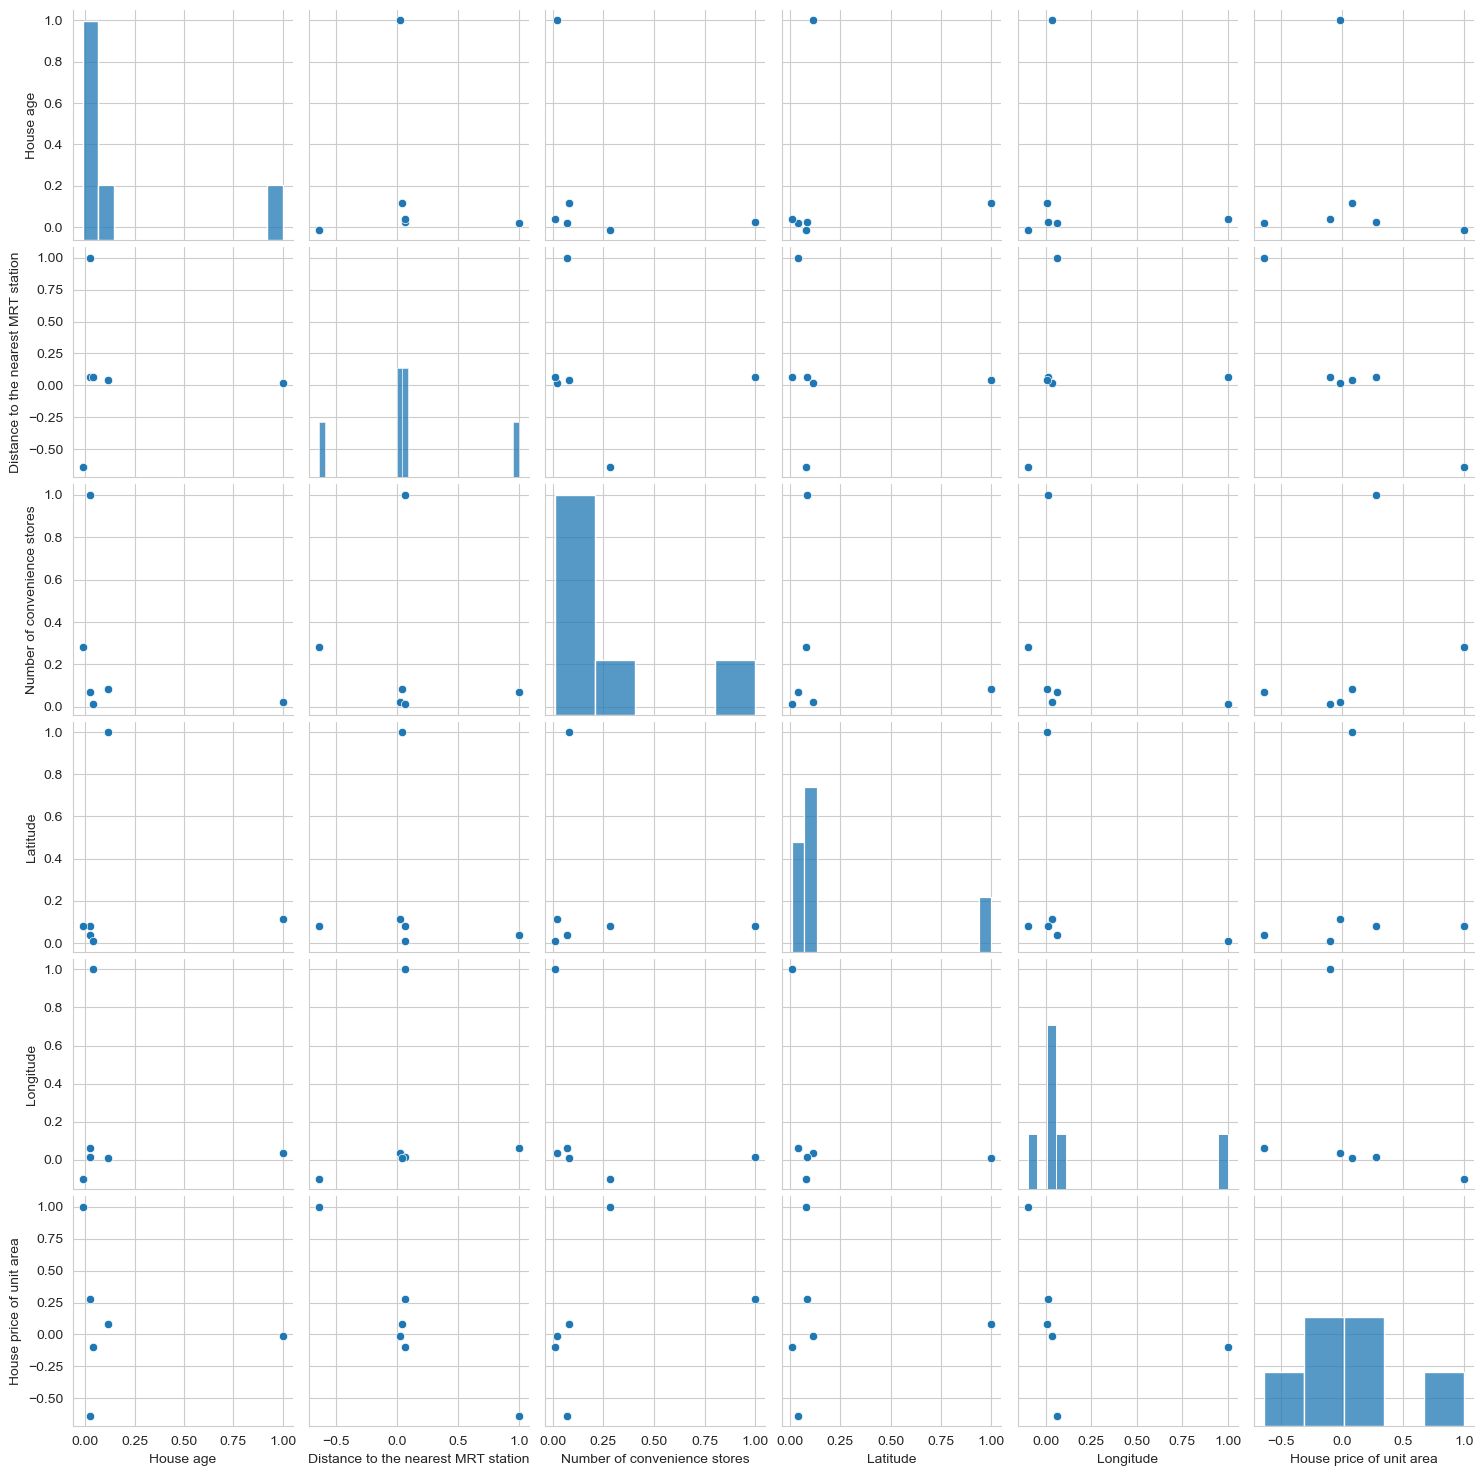

In [390]:
sns.pairplot(data.corr())

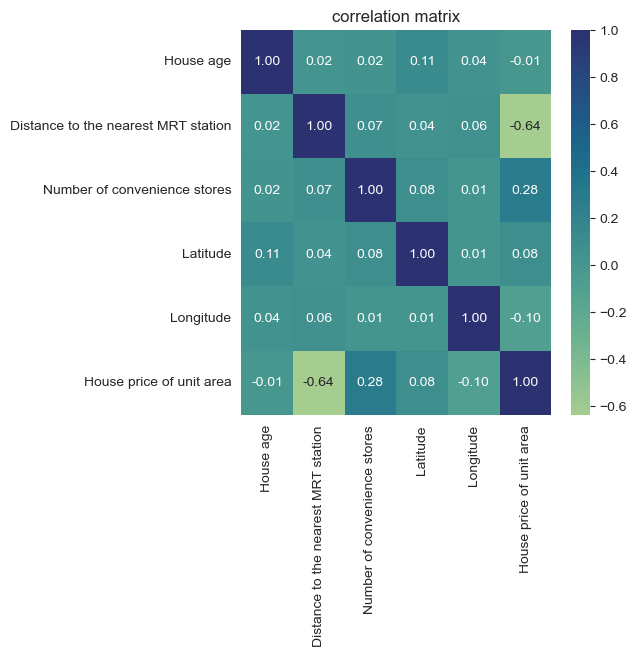

In [391]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,cmap='crest',fmt='.2f')
plt.title('correlation matrix')
plt.xticks(rotation=90)
plt.show()

EDA

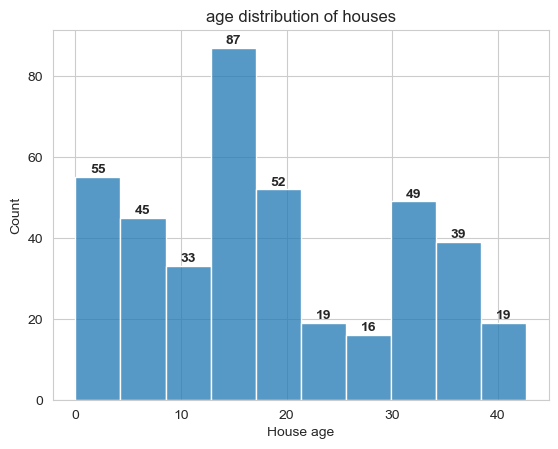

In [392]:

sns.histplot(data=data['House age'],bins=10)

counts, barheight = np.histogram(data['House age'],bins=10)

for i in range(len(counts)):
    plt.text((barheight[i]+barheight[1+i])/2,counts[i]+1,str(counts[i]),ha='center',fontweight='bold')
    
sns.set_style('whitegrid')
plt.title('age distribution of houses')
plt.show()


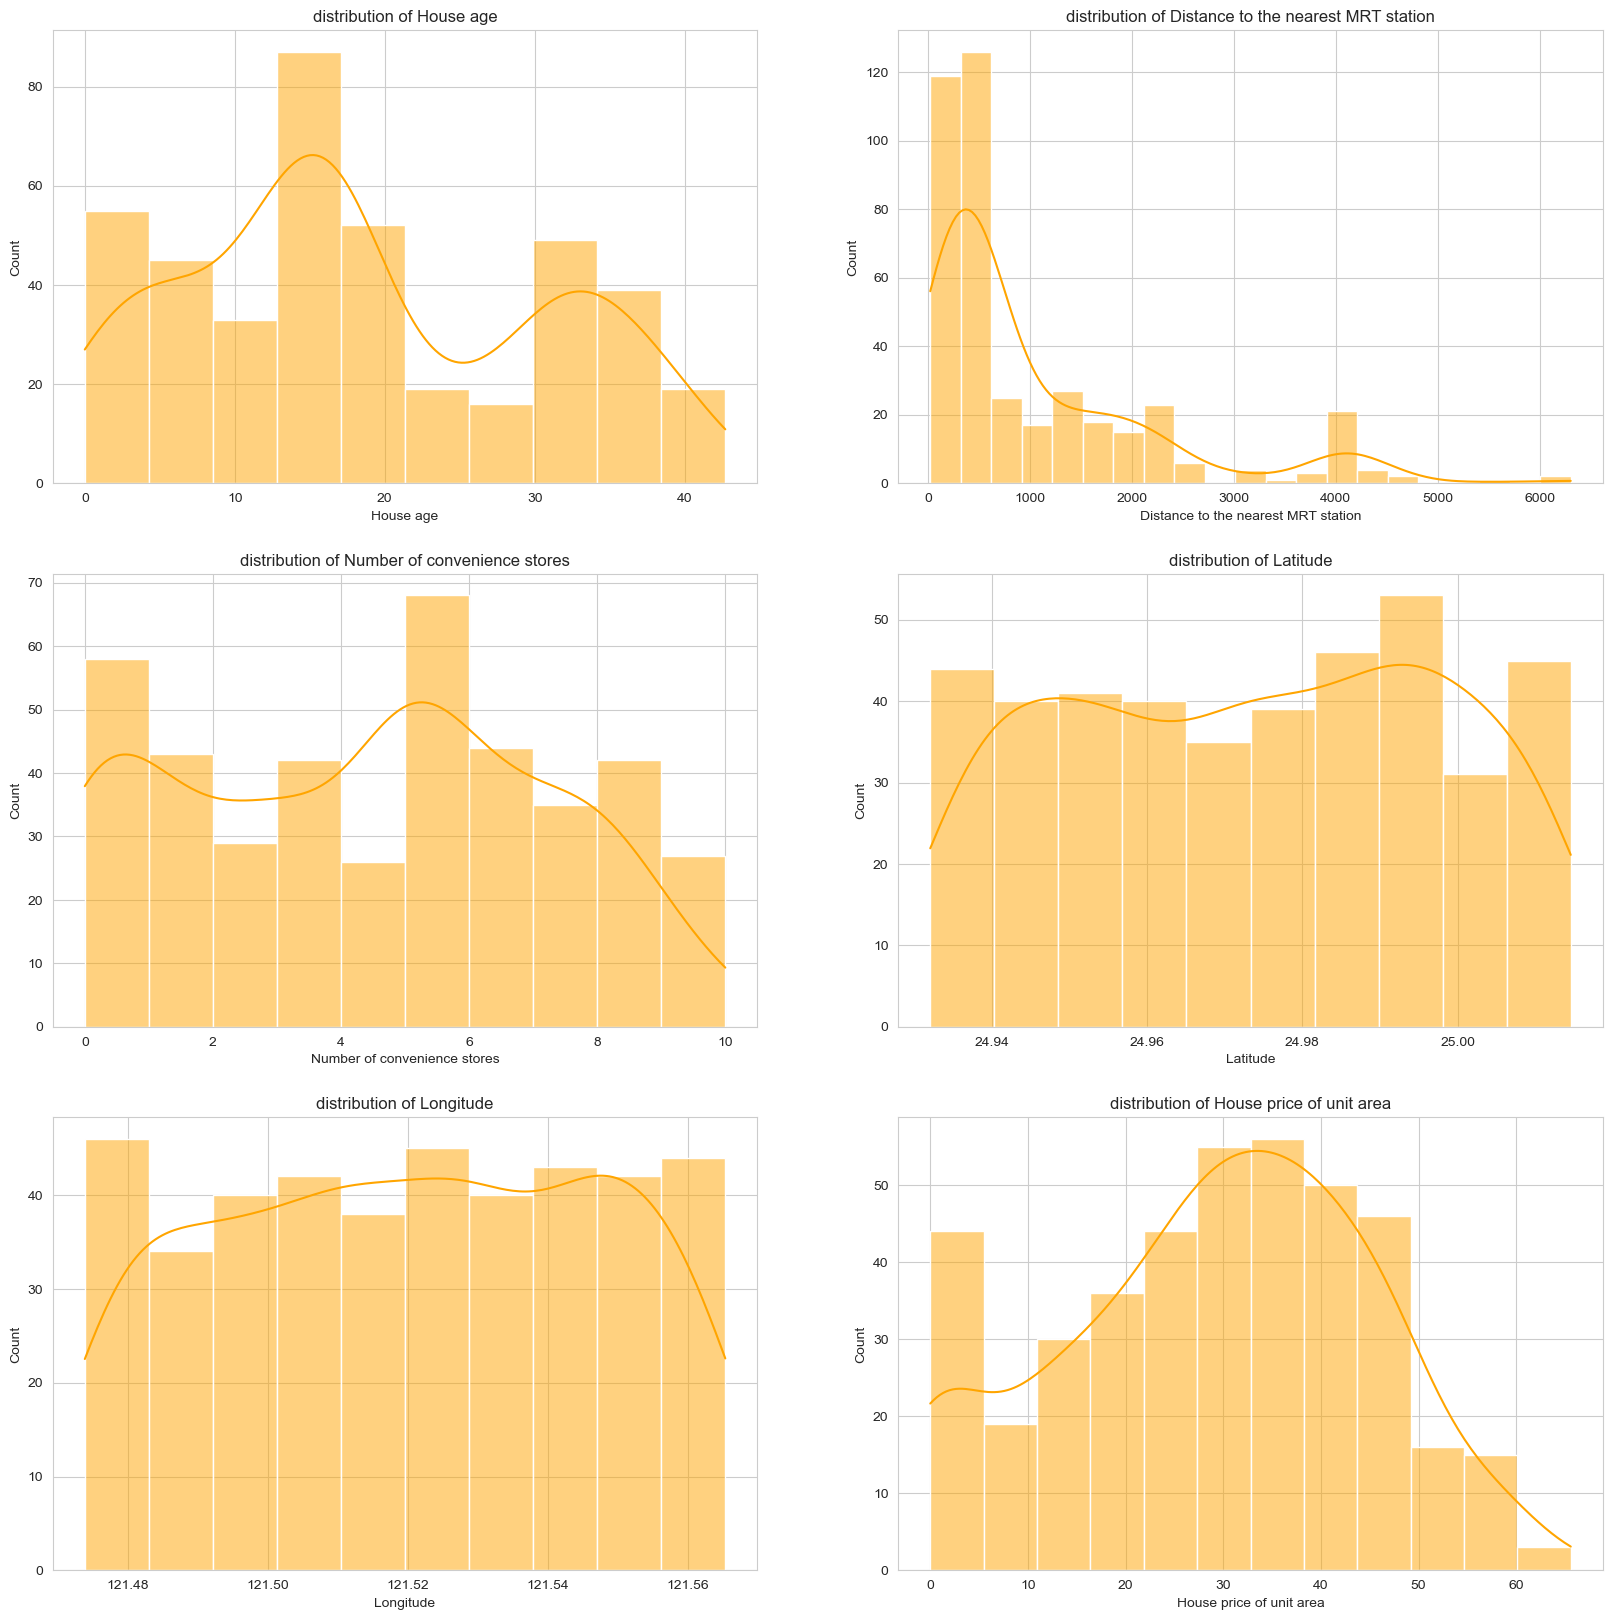

In [393]:
char = ['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(20,20))
axes = axes.flatten()

for i,col in enumerate(char):
    sns.histplot(data[col],kde=True,ax=axes[i],color='orange')
    axes[i].set_title(f'distribution of {col}')
    
sns.set_style('whitegrid')  
plt.show()

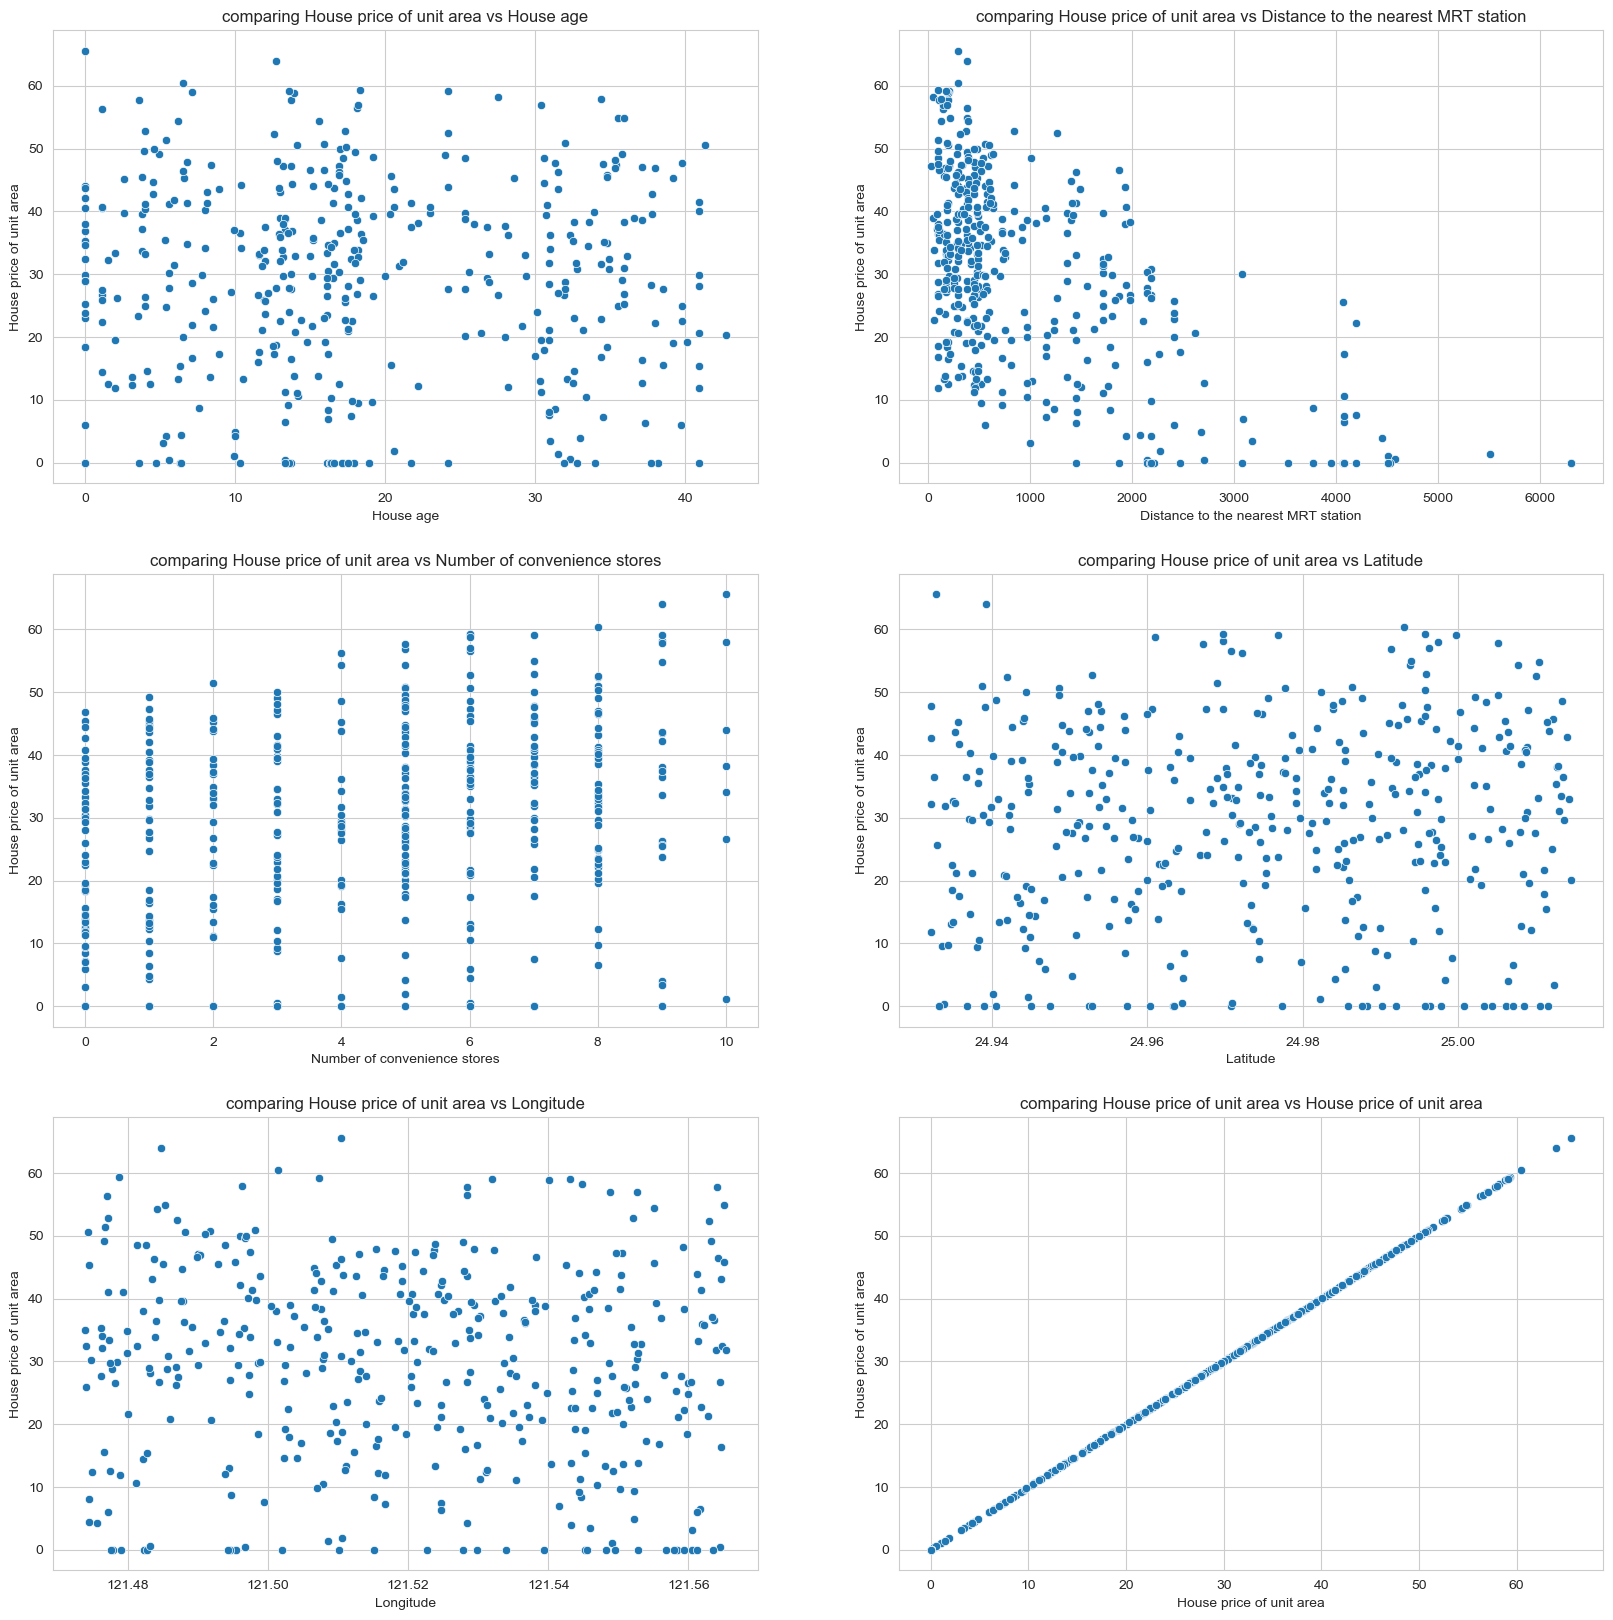

In [394]:
char = ['House age','Distance to the nearest MRT station','Number of convenience stores','Latitude','Longitude','House price of unit area']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(20,20))
axes = axes.flatten()

for i,col in enumerate(char):
    sns.scatterplot(data=data, x=col, y= data['House price of unit area'], ax=axes[i])
    axes[i].set_title(f'comparing House price of unit area vs {col}')

sns.set_style('whitegrid')
plt.show()

Models

In [395]:
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


Linear Regression Model

In [396]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

independent_char = data.drop(['Transaction date','House price of unit area'],axis=1)
dependent_char = data['House price of unit area']

x_train, x_test, y_train, y_test = train_test_split(independent_char, dependent_char, test_size=0.3, random_state=42)

scalar = StandardScaler()
x_train_scalar = scalar.fit_transform(x_train)
x_test_scalar = scalar.transform(x_test)


model = LinearRegression()
model.fit(x_train_scalar,y_train)

prediction = model.predict(x_test_scalar)

Mean_Square_Error = mean_squared_error(y_test, prediction)
Mean_Absolute_Error = mean_absolute_error(y_test, prediction)
R2_Score = r2_score(y_test, prediction)

print('Evaluation metrics of Linear Regression Model :')
print(f'Mean_Square_Error : {Mean_Square_Error:.2f}')
print(f'Mean_Absolute_Error : {Mean_Absolute_Error:.2f}')
print(f'R2_Score : {R2_Score:.2f}')

Evaluation metrics of Linear Regression Model :
Mean_Square_Error : 130.96
Mean_Absolute_Error : 9.66
R2_Score : 0.55


creating pickel file

In [403]:
with open('linear_regression_model.pkl','wb') as file:
    pickle.dump(model, file)
    
with open('linear_regression_model.pkl','rb') as file:
    loaded_model = pickle.load(file)
    
new_predictions = loaded_model.predict(x_test_scalar)

Mean_Square_Error = mean_squared_error(y_test, new_predictions)
Mean_Absolute_Error = mean_absolute_error(y_test, new_predictions)
R2_Score = r2_score(y_test, new_predictions)

print('Evaluation metrics of Linear Regression Model :')
print(f'Mean_Square_Error : {Mean_Square_Error:.2f}')
print(f'Mean_Absolute_Error : {Mean_Absolute_Error:.2f}')
print(f'R2_Score : {R2_Score:.2f}')

Evaluation metrics of Linear Regression Model :
Mean_Square_Error : 130.96
Mean_Absolute_Error : 9.66
R2_Score : 0.55


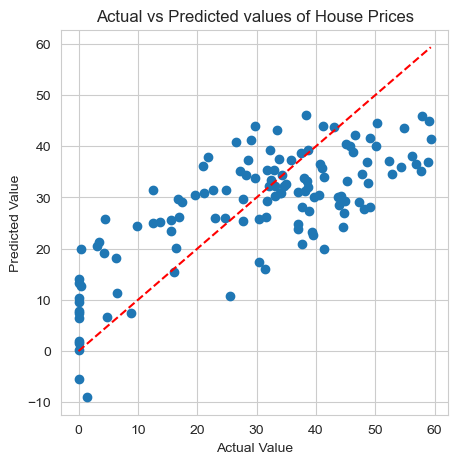

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'k--',color='red')
plt.title('Actual vs Predicted values of House Prices')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()


Random Forest Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

actual = data.drop(['Transaction date','House price of unit area'],axis=1)
target = data['House price of unit area']

X_train, X_test, Y_train, Y_test = train_test_split(actual, target, test_size=0.3, random_state=42)

#stand = StandardScaler()
#X_train_stand = stand.fit_transform(X_train)
#X_test_stand = stand.transform(X_test)

model_ = RandomForestRegressor(n_estimators=100, random_state=42)
model_.fit(X_train,Y_train)

pred = model_.predict(X_test)


Mean_Square_Error_Random_Forest = mean_squared_error(Y_test, pred)
Mean_Absolute_Error_Random_Forest = mean_absolute_error(Y_test, pred)
R2_Score_Random_Forest = r2_score(Y_test, pred)

print('Evaluation metrics of Random Forest Regression Model :')
print(f'Mean_Square_Error : {Mean_Square_Error_Random_Forest:.2f}')
print(f'Mean_Absolute_Error : {Mean_Absolute_Error_Random_Forest:.2f}')
print(f'R2_Score : {R2_Score_Random_Forest:.2f}')



Evaluation metrics of Random Forest Regression Model :
Mean_Square_Error : 136.48
Mean_Absolute_Error : 9.65
R2_Score : 0.53


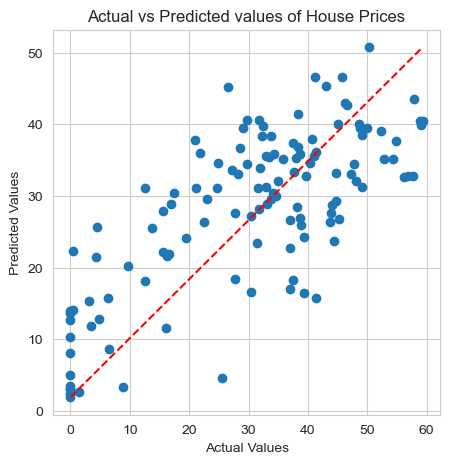

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, pred)
plt.plot([Y_test.min(),Y_test.max()], [pred.min(),pred.max()],'k--',color='red')
plt.title('Actual vs Predicted values of House Prices')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

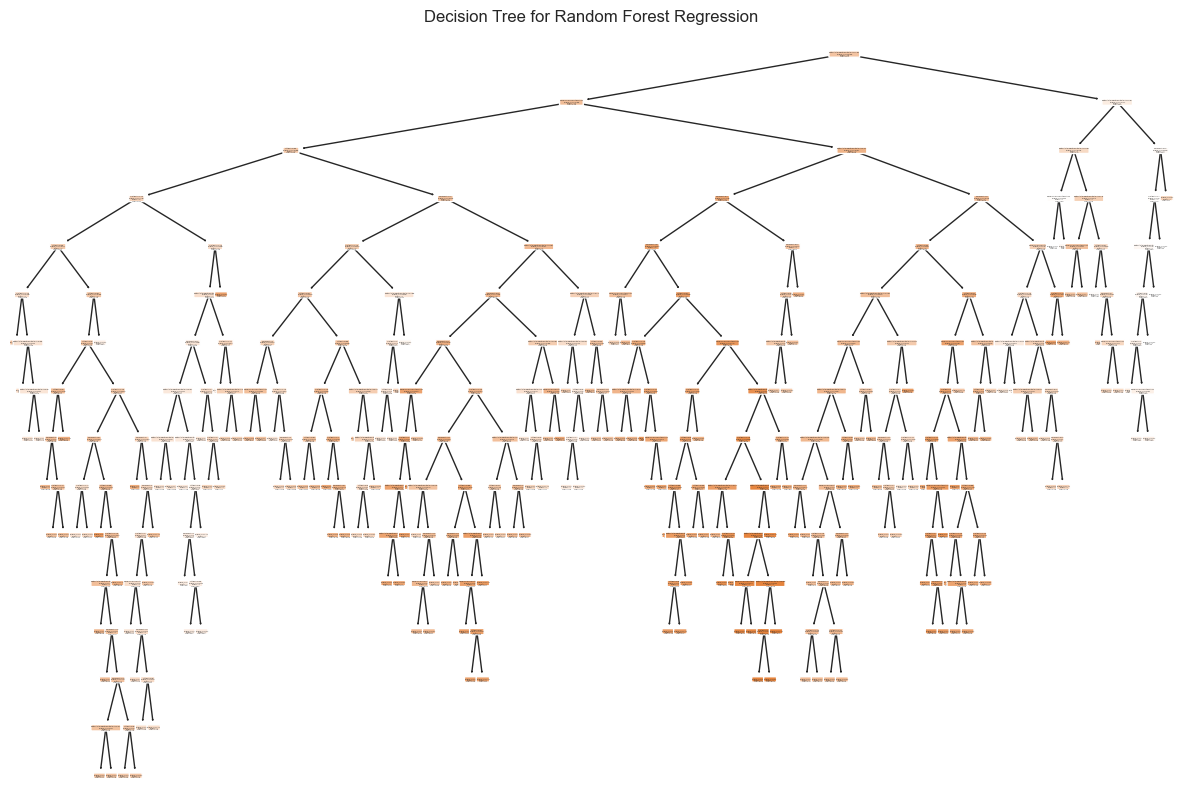

In [ ]:
from sklearn.tree import plot_tree

tree_to_plot = model_.estimators_[0]

plt.figure(figsize=(15,10))
plot_tree(tree_to_plot,feature_names=actual.columns, filled=True, rounded=True)
plt.title('Decision Tree for Random Forest Regression')
plt.show()

Comparing of Models

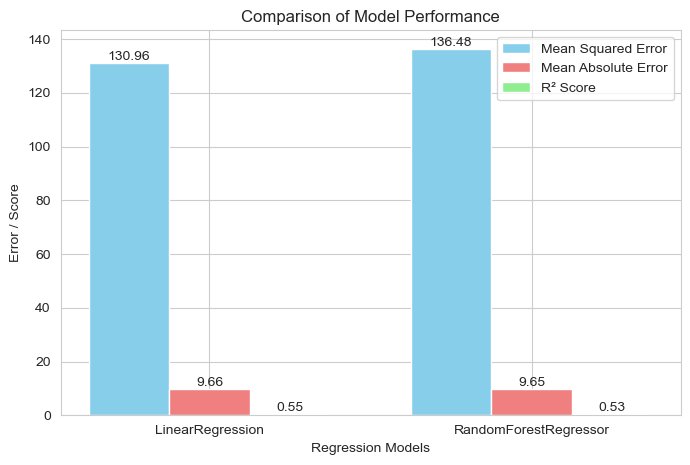

In [ ]:
models = ['LinearRegression', 'RandomForestRegressor']
mse_values = [Mean_Square_Error,Mean_Square_Error_Random_Forest]
mae_values = [Mean_Absolute_Error,Mean_Absolute_Error_Random_Forest]
r2_score = [R2_Score,R2_Score_Random_Forest]

x = np.arange(len(models))
width = 0.25 

fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - width, mse_values, width, label="Mean Squared Error", color="skyblue")
bars2 = ax.bar(x, mae_values, width, label="Mean Absolute Error", color="lightcoral")
bars3 = ax.bar(x + width, r2_values, width, label="R² Score", color="lightgreen")

ax.set_xlabel("Regression Models")
ax.set_ylabel("Error / Score")
ax.set_title("Comparison of Model Performance")
ax.set_xticks(x)
ax.set_xticklabels(models,)
ax.legend()

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

